In [46]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

In [54]:
# Image size and batch size
IMG_SIZE = (224, 224) # All images are resized to a common size
BATCH_SIZE = 32 # No of images processed at once during training/testing


In [55]:
# load datasets
train_dir = r"C:\Users\User\OneDrive\Desktop\data\defect_detector\casting_data\casting_data\train"
test_dir  = r"C:\Users\User\OneDrive\Desktop\data\defect_detector\casting_data\casting_data\test"

#image-based CNN model and Keras handles most preprocessing and encoding automatically.So, i didn't do those steps

In [56]:
# Feature Scaling & data augmentation
train_datagen = ImageDataGenerator(
    rescale = 1./255,  # Normalize pixel values between 0 & 1
    rotation_range = 20, # Randomly rotate images
    zoom_range = 0.2, # Randomly zoom images
    horizontal_flip = True # Randomly flip images horizontally
)

test_datagen = ImageDataGenerator(rescale=1./255)


In [57]:
# Load training images 
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = IMG_SIZE,
    batch_size = BATCH_SIZE,
    class_mode = 'binary' # Binary labels (defective / non-defective)
)

# Load testing images
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size = IMG_SIZE,
    batch_size = BATCH_SIZE,
    class_mode = 'binary',  # Binary classification
    shuffle = False  # Keep order constant
)

print("Class Labels:", train_data.class_indices)


Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.
Class Labels: {'def_front': 0, 'ok_front': 1}


In [52]:
# Create a sequential CNN model
model = Sequential()

# Convolution Layer 1 (32 feature maps, 3x3 filters)
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2)) # Max pooling reduce spatial size & computation

# Convolution Layer 2 (64 feature maps, 3x3 filters)
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

# Convolution Layer 3 (128 feature maps, 3x3 filters)
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

# Flattening
model.add(Flatten()) #3D feature maps into 1D vector

# Fully Connected Layers with 128 neurons
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5)) # prevent overfitting

# Output Layer for binary classification
model.add(Dense(1, activation='sigmoid')) # Outputs probability between 0 & 1

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(
    train_data,
    epochs = 10,  # N0n of times the model sees the entire training data
    validation_data = test_data # Evaluate model performance
)


Epoch 1/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 193s 921ms/step - accuracy: 0.6204 - loss: 0.6556 - val_accuracy: 0.8573 - val_loss: 0.4060
Epoch 2/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 150s 721ms/step - accuracy: 0.8728 - loss: 0.3170 - val_accuracy: 0.6657 - val_loss: 0.6950
Epoch 3/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 903s 4s/step - accuracy: 0.9062 - loss: 0.2444 - val_accuracy: 0.8378 - val_loss: 0.3729
Epoch 4/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 138s 663ms/step - accuracy: 0.9300 - loss: 0.1867 - val_accuracy: 0.9385 - val_loss: 0.1555
Epoch 5/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 151s 724ms/step - accuracy: 0.9352 - loss: 0.1704 - val_accuracy: 0.9357 - val_loss: 0.1797
Epoch 6/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 146s 698ms/step - accuracy: 0.9451 - loss: 0.1497 - val_accuracy: 0.9007 - val_loss: 0.2402
Epoch 7/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 134s 643ms/step - accuracy: 0.9474 - loss: 0.1399 - val_accuracy: 0.9497 - val_loss: 0.1461
Epoch 8/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 137s 659ms/step - accuracy: 0.9590 - lo

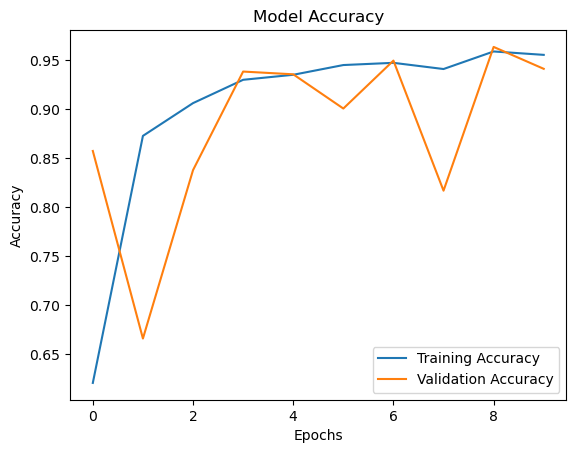

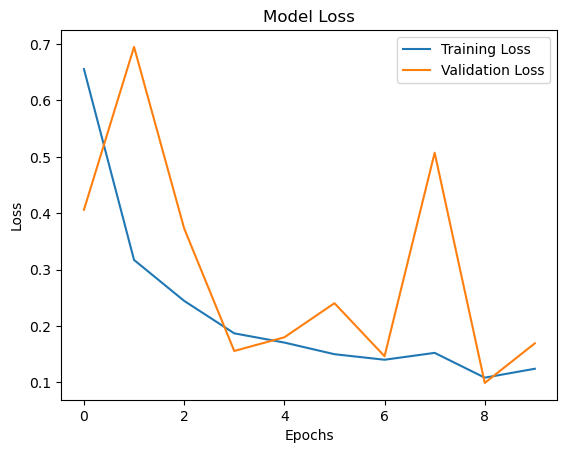

23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 160ms/step 


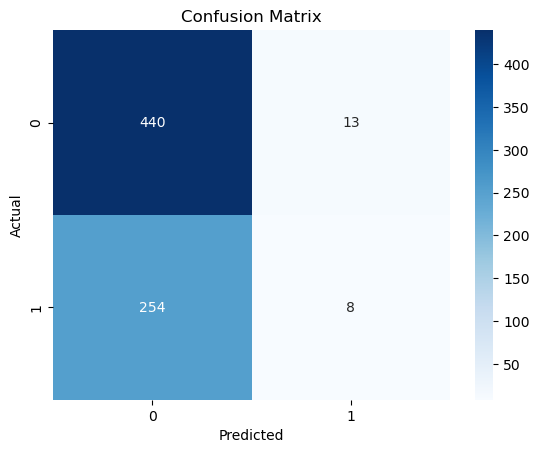

               precision    recall  f1-score   support

    Defective       0.63      0.97      0.77       453
Non-Defective       0.38      0.03      0.06       262

     accuracy                           0.63       715
    macro avg       0.51      0.50      0.41       715
 weighted avg       0.54      0.63      0.51       715



In [58]:
# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

predictions = model.predict(test_data)
# Convert probability values into class labels
predicted_classes = (predictions > 0.5).astype("int32")

# confusion matrix 
cm = confusion_matrix(test_data.classes, predicted_classes)

# Visualize confusion matrix as heatmap
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')  # annot=True -> Annotated integers
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Get classification report
print(classification_report(
    test_data.classes,
    predicted_classes,
    target_names=['Defective', 'Non-Defective']
))


In [29]:
# Save the trained CNN model
model.save("defect_detection_cnn_model.h5")

print("Model saved successfully!")


Model saved successfully!


In [72]:
def predict_defect(image_path, model):
    """
    This function takes an image path and a trained CNN model,
    then predicts whether the product is Defective or Non-Defective.
    """

    # Load image with target size (IMG_SIZE)
    img = image.load_img(image_path, target_size = (224, 224))

    # Convert image to array
    img_array = image.img_to_array(img)

    # Expand dimensions to match model input shape(1,224,224,3)
    img_array = np.expand_dims(img_array, axis=0)

    # Normalize the image
    img_array = img_array / 255.0

    # Prediction
    prediction = model.predict(img_array)

    # Binary classification threshold = 0.5
    if prediction[0][0] > 0.5:
        result = "Non-Defective"
    else:
        result = "Defective"

    # Display image and prediction
    plt.imshow(img)
    plt.title(f"Prediction: {result}")
    plt.axis('off')
    plt.show()

    return result


In [69]:
# Load the saved model
model = load_model("defect_detection_cnn_model.h5")

print("Model loaded successfully!")


Model loaded successfully!


In [70]:
predictions = model.predict(test_data)
predicted_classes = (predictions > 0.5).astype("int32")#astype() converts the data type of the array elements into 32-bit integers.

print(predicted_classes[:10]) 


23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step
[[1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


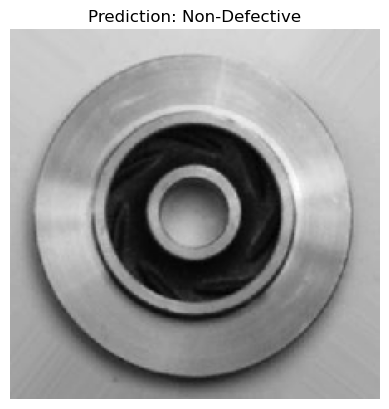

Final Prediction: Non-Defective


In [71]:
# Input your image path
test_image_path = "C:/Users/User/OneDrive/Desktop/data/defect_detector/casting_data/casting_data/test/def_front\cast_def_0_150.jpeg"

output = predict_defect(test_image_path, model)
print("Final Prediction:", output)